## BOLT Bootcamp Competition 2023 - Team CAFE
**All source data can be found in the `data` folder**

In [1]:
# Additional dependencies that must be installed via pip or conda: openpyxl, matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Creating base dataframes from the datasets
activity_df = pd.read_excel('data/Activity Table Dataset.xlsx')
case_df = pd.read_excel('data/case table.xlsx')
emissions_df = pd.read_excel('data/emission_by_activity.xlsx')
materials_df = pd.read_excel('data/material_costs.xlsx')

# Adding a 'Day' column to our Activity dataframe
activity_df['Day'] = activity_df['Timestamp'].apply(lambda x: x.date())
activity_df['Day'] = pd.to_datetime(activity_df['Day'])

In [3]:
activity_df.head(3)

,Sorting,caseID,Activity Name,Timestamp,Day
0,0,1,Purchase Requisition Created,2021-05-03 17:30:00.000,2021-05-03
1,1,1,Purchase Order Reviewed,2021-05-03 17:30:00.000,2021-05-03
2,2,1,Purchase Order Approved,2021-05-07 20:18:39.610,2021-05-07


In [4]:
# Interesting that the activity_df and the case_df are related by the caseID attribute. 
# Some useful information can probably be extracted by merging these tables and visualizing them
case_df.head(3)

,Sorting,caseID,Material Code,Material,Vendor,Amount Ordered
0,0,1,CP4560,Titanium Dioxides,ColorPlus Manufacturing,13.649110
1,1,2,CP5644,Specialty Resins,ColorPlus Manufacturing,28.313711
2,2,3,SI8599,Solvents,Sunlight Industries,18.231351


In [5]:
# This table is also connected to the others.
# Joining it with the activity table for example could provide useful emission statistics
emissions_df.head(3)

,Activity,CO2 Emissions (kg/tonne)
0,Purchase Requisition Created,"0,1"
1,Purchase Order Reviewed,"0,1"
2,Purchase Order Approved,"0,1"


In [6]:
materials_df.head(3)

,Material,Price of Material (USD/tonne),Emission from Manufacturing (kg/tonne)
0,Latex & Monomers,"1049,96",231
1,Packaging,"1360,85",756
2,Solvents,"1169,79",210


## Analysis of the Activities dataset

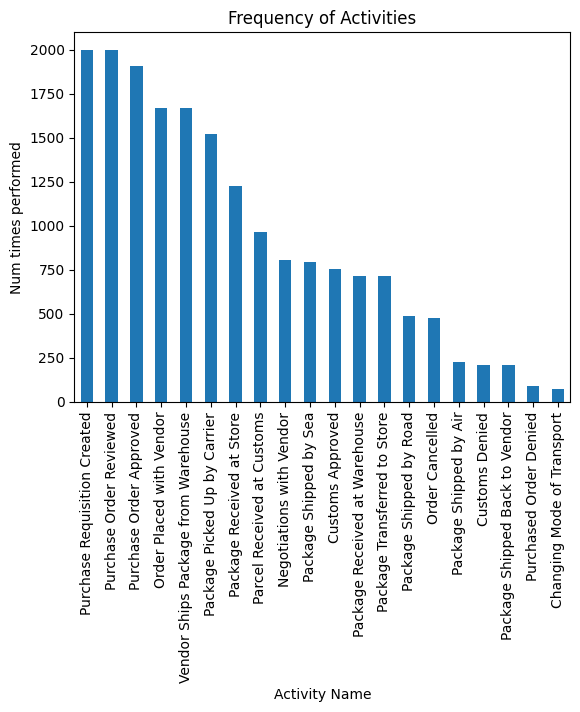

In [7]:
# Looking at the frequency of the various activities
activity_counts = activity_df['Activity Name'].value_counts()
activity_counts.plot(kind='bar')

plt.xlabel('Activity Name')
plt.ylabel('Num times performed')
plt.title('Frequency of Activities')
plt.show()

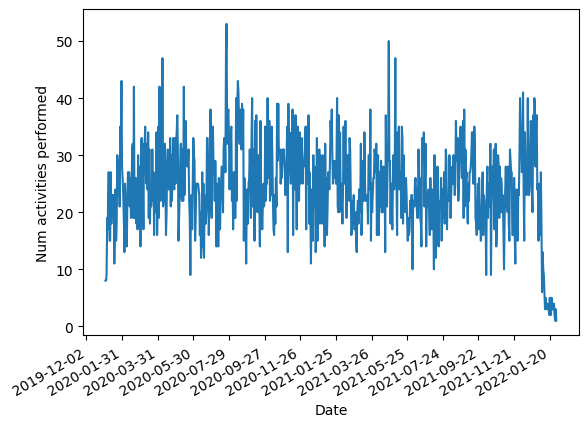

In [8]:
# Looking at the days on which the activities occur
day_counts = activity_df['Day'].value_counts()
day_counts.plot(kind='line')

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xlabel('Date')
plt.ylabel('Num activities performed')
plt.show()

# Analysis of the Case dataset

In [18]:
# The table below has stats for each material in the case_df, note that values are rounded to round_dec places
round_dec = 3
mat_arr = case_df['Material'].unique()
material_stats = {"Material": mat_arr, 
                  "Avg order": [], 
                  "Std of order": [], 
                  "Std of order as % of avg": [],
                  "Num orders": [], 
                  "Largest order": [], 
                  "Smallest order": [],
                  "Total amount ordered": []}

for mat in mat_arr:
    avg_order = case_df.query(f'Material == "{mat}"')['Amount Ordered'].mean() # save as local var for use in other column
    material_stats[f"Avg order"].append(round(avg_order, round_dec))
    material_stats[f"Std of order"].append(round(case_df.query(f'Material == "{mat}"')['Amount Ordered'].std(), round_dec))
    material_stats[f"Std of order as % of avg"].append(round(case_df.query(f'Material == "{mat}"')['Amount Ordered'].std()/avg_order*100, round_dec))
    material_stats[f"Num orders"].append(len(case_df.query(f'Material == "{mat}"')['Amount Ordered']))
    material_stats[f"Largest order"].append(round(case_df.query(f'Material == "{mat}"')['Amount Ordered'].max(), round_dec))
    material_stats[f"Smallest order"].append(round(case_df.query(f'Material == "{mat}"')['Amount Ordered'].min(), round_dec))
    material_stats[f"Total amount ordered"].append(round(case_df.query(f'Material == "{mat}"')['Amount Ordered'].sum(), round_dec))
    

pd.DataFrame(material_stats)

,Material,Avg order,Std of order,Std of order as % of avg,Num orders,Largest order,Smallest order,Total amount ordered
0,Titanium Dioxides,10.164,2.964,29.159,272,14.984,5.002,2764.515
1,Specialty Resins,29.218,8.817,30.176,275,44.983,15.012,8034.882
2,Solvents,38.082,12.652,33.224,270,59.941,15.224,10282.007
3,Pigments & Colorants,89.200,36.490,40.907,257,149.400,30.123,22924.516
4,Packaging,19.784,5.951,30.079,268,29.948,10.067,5302.014
5,Additives,43.428,20.271,46.677,241,79.945,10.057,10466.044
6,Commodity Resins,6.579,1.940,29.489,272,9.998,3.009,1789.409
7,Latex & Monomers,64.264,19.607,30.510,145,99.719,30.537,9318.287


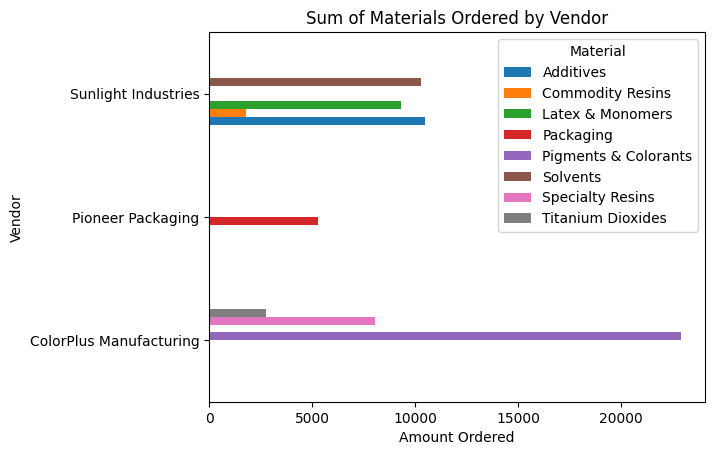

In [10]:
case_pivot_table = pd.pivot_table(case_df, values='Amount Ordered', index='Vendor', columns='Material', aggfunc='sum')
case_pivot_table.plot(kind='barh')

plt.xlabel('Amount Ordered')
plt.ylabel('Vendor')
plt.title('Sum of Materials Ordered by Vendor')
plt.show()

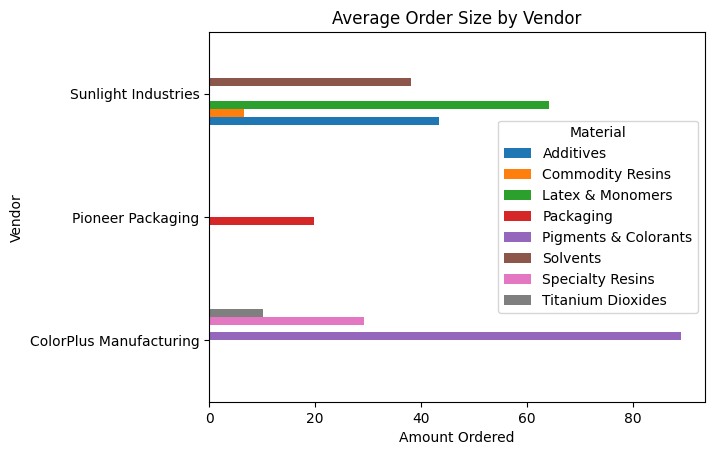

In [11]:
case_pivot_table_1 = pd.pivot_table(case_df, values='Amount Ordered', index='Vendor', columns='Material', aggfunc='mean')
case_pivot_table_1.plot(kind='barh')

plt.xlabel('Amount Ordered')
plt.ylabel('Vendor')
plt.title('Average Order Size by Vendor')
plt.show()

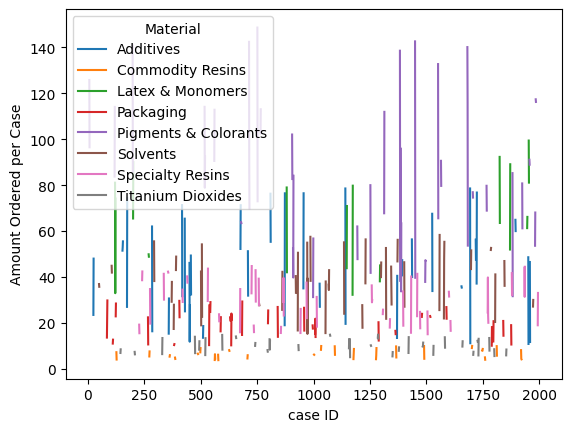

In [12]:
case_pivot_table_2 = pd.pivot_table(case_df, values='Amount Ordered', index='caseID', columns='Material', aggfunc='sum')

case_pivot_table_2.plot()
plt.xlabel('case ID')
plt.ylabel('Amount Ordered per Case')
plt.show()